<a href="https://colab.research.google.com/github/yingzibu/MOL2ADMET/blob/main/examples/experiments/VAE/VAE_only_on_data_M5_11_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install PyTDC --quiet
! pip install selfies  --quiet
! pip install pubchempy --quiet
! pip install rdkit --quiet
! pip install mycolorpy --quiet
! pip install dgllife --quiet
! pip install molvs --quiet
! pip install dgl -f https://data.dgl.ai/wheels/cu118/repo.html --quiet
! pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet

! pip install DeepPurpose --quiet
! pip install git+https://github.com/bp-kelley/descriptastorus --quiet
! pip install pandas-flavor --quiet

## Code

In [1]:
cd /content/drive/MyDrive/ADMET

/content/drive/MyDrive/ADMET


In [2]:
from scripts.func_utils import *
from scripts.yaml_utils import *
from scripts.eval_utils import *
from scripts.preprocess_mols import *
from scripts.model_architecture import *
from scripts.dataset import *
from scripts.train import *
from tdc.utils import retrieve_label_name_list
import pandas as pd
from scripts.get_vocab import *

from tdc.single_pred import ADME
from tdc.single_pred import Tox
label_list = retrieve_label_name_list('herg_central')


Vocab type for RNN: smiles


## Train M5

In [ ]:
names = names_M5

vocab_type = 'smiles'
trn, val, tst = collect_data(names)
config = get_config('VAE', names, scale_dict=None, vocab_type=vocab_type)
path_here = f'M5/VAE_{vocab_type}'
config['model_path'] = f'{path_here}.pt'
config['encoder_path'] = f'{path_here}_encoder.pt'
config['decoder_path'] = f'{path_here}_decoder.pt'
config['classifier_path'] = f'{path_here}_classifier.pt'
config['config_path'] = f'{path_here}.yml'
config['figure_path'] = f'{path_here}/fig'
config['MAX_EPOCH'] = 100
config['patience'] = 10
config['verbose_freq'] = 10
config['uw'] = True
trn_l, val_l, tst_l, vocab = get_multi_loader(trn, val, tst, config)

# models.load_model('VAE/qed_sa.pt') # load model from pretrained on qed and sa


In [ ]:
models = PRED(**config)

Model type:  VAE | Model parameters:  7889067


In [ ]:
p = models.train(trn_l, val_l, tst_l, tst, len(tst), 1)

Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!


collect data for:  ['CYP2C19_Veith', 'CYP2D6_Veith', 'CYP3A4_Veith', 'CYP1A2_Veith', 'CYP2C9_Veith']


Found local copy...
Loading...
Done!


--> preparing data loader for model type  VAE
Model type:  VAE | Model parameters:  7889067
finish load data status 

load pretrained model from  M5/VAE_smiles.pt
[Test] Loss: 0.740 | Classify: 0.277
*************** CYP2C19_Veith ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.814  &0.816  &0.777  &0.835  &0.796  &0.805 &0.887 &0.629 &0.853


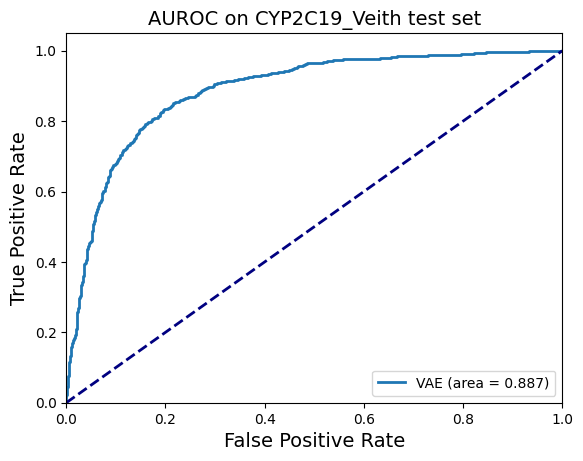

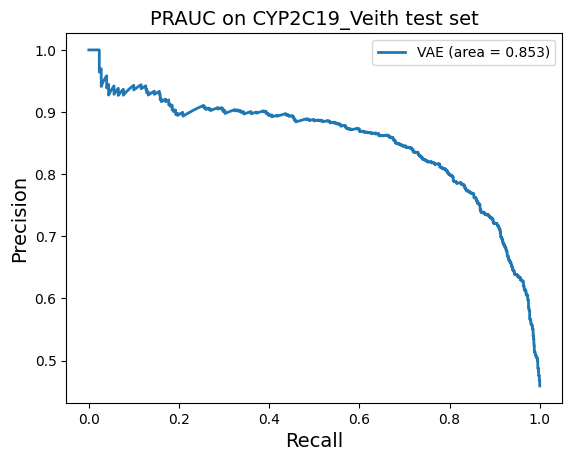


*************** CYP2D6_Veith ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.852  &0.694  &0.651  &0.443  &0.946  &0.527 &0.829 &0.455 &0.609


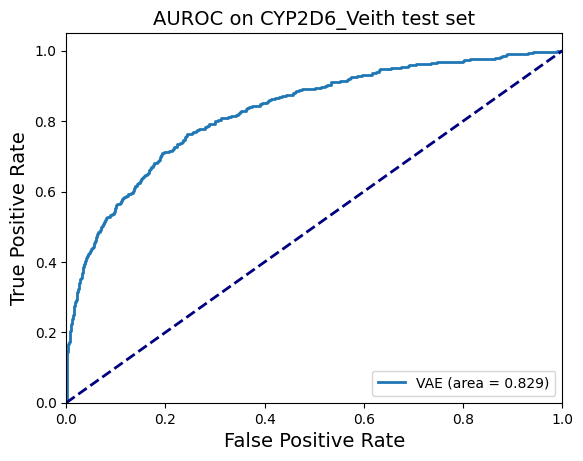

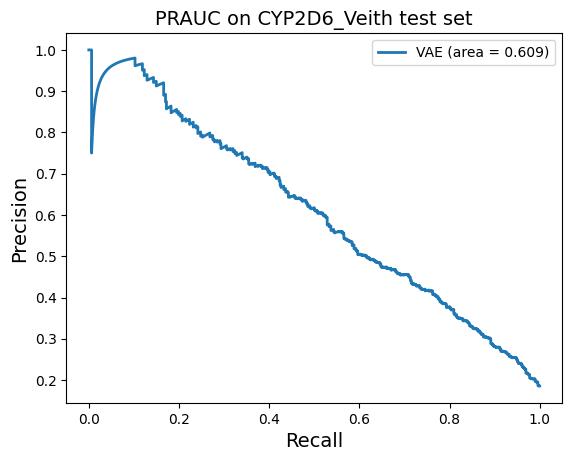


*************** CYP3A4_Veith ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.763  &0.761  &0.698  &0.749  &0.772  &0.723 &0.847 &0.517 &0.786


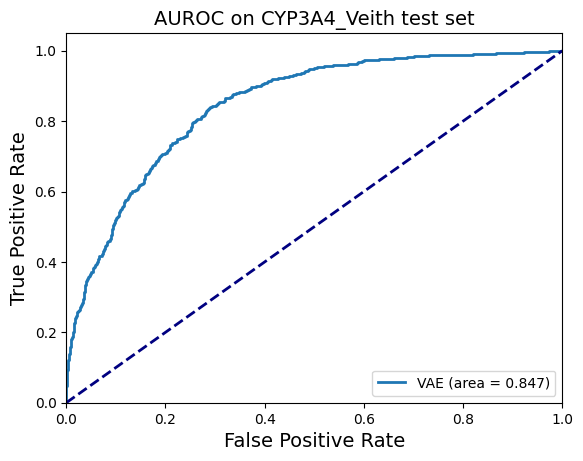

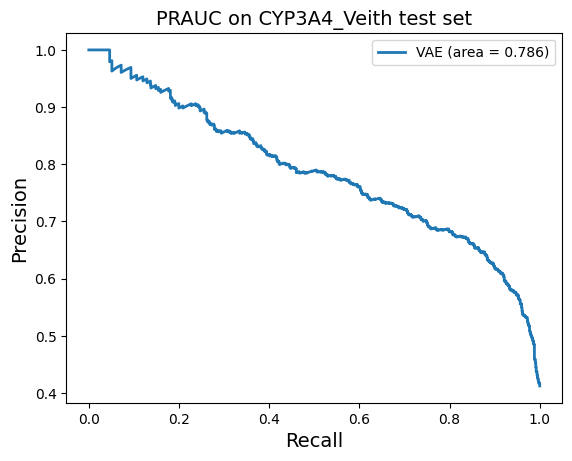


*************** CYP1A2_Veith ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.839  &0.841  &0.800  &0.877  &0.804  &0.837 &0.916 &0.681 &0.905


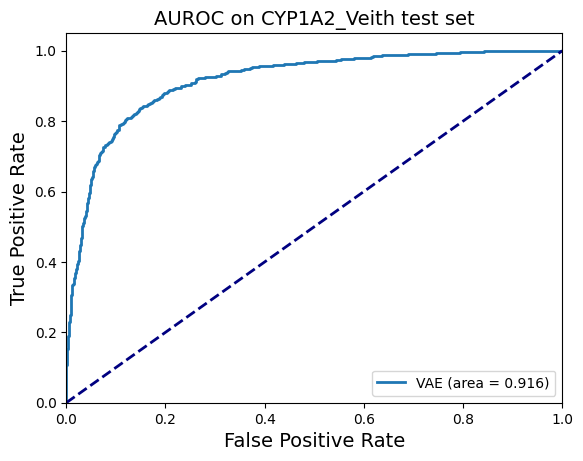

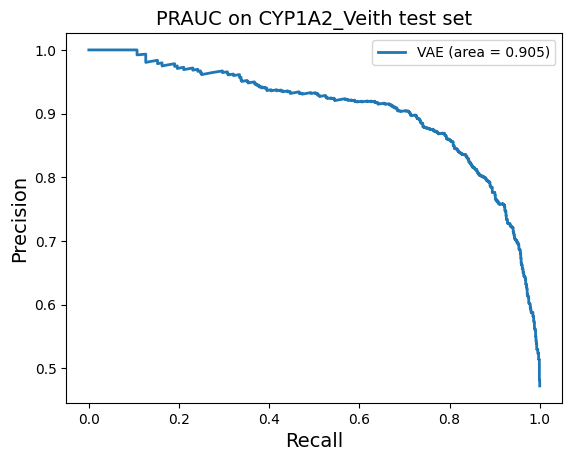


*************** CYP2C9_Veith ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.829  &0.812  &0.742  &0.759  &0.865  &0.751 &0.893 &0.621 &0.799


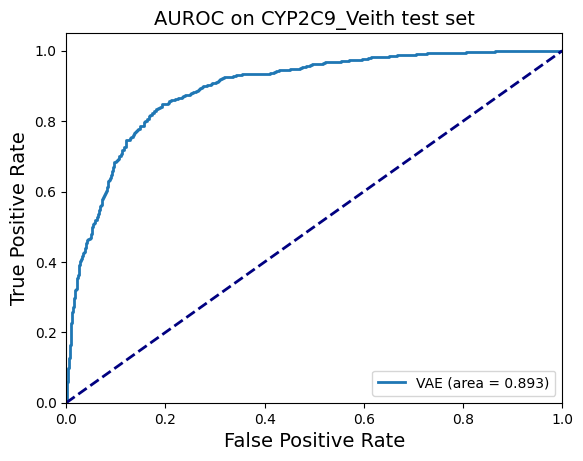

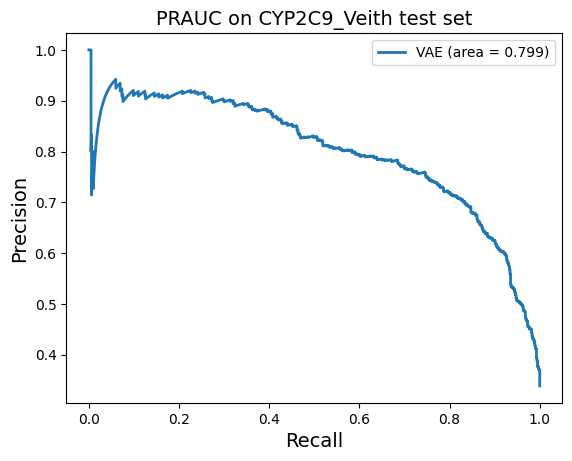

In [4]:
performance = yml_report(config['config_path'], recalculate=True)

---> load gif from  M5/VAE_smiles/fig_CYP2C19_Veith.gif


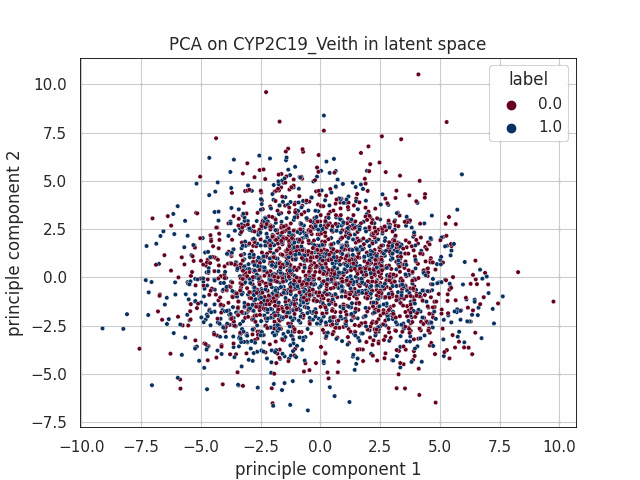

---> load gif from  M5/VAE_smiles/fig_CYP2D6_Veith.gif


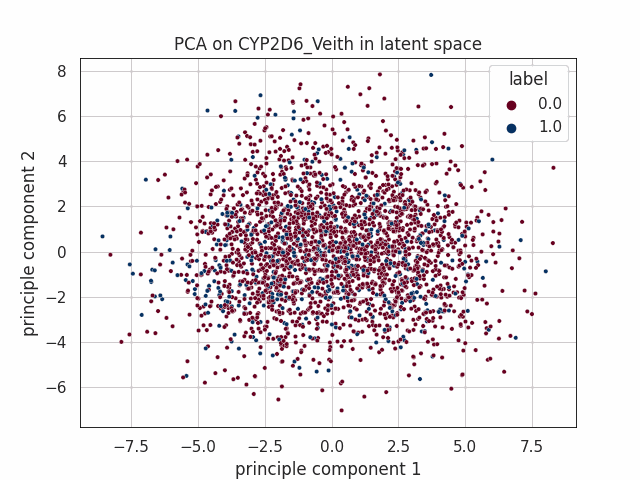

---> load gif from  M5/VAE_smiles/fig_CYP3A4_Veith.gif


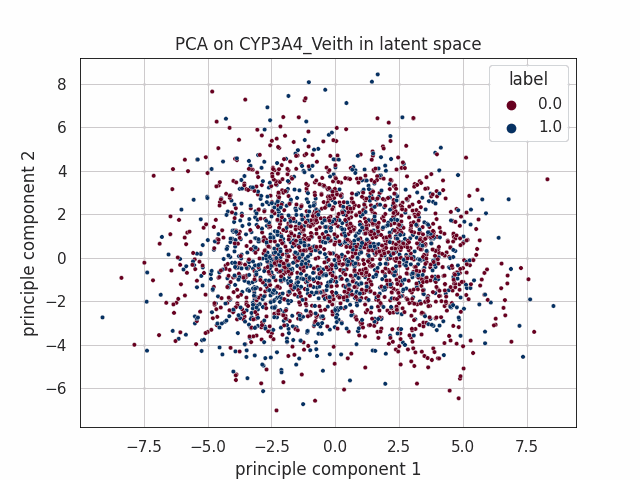

---> load gif from  M5/VAE_smiles/fig_CYP1A2_Veith.gif


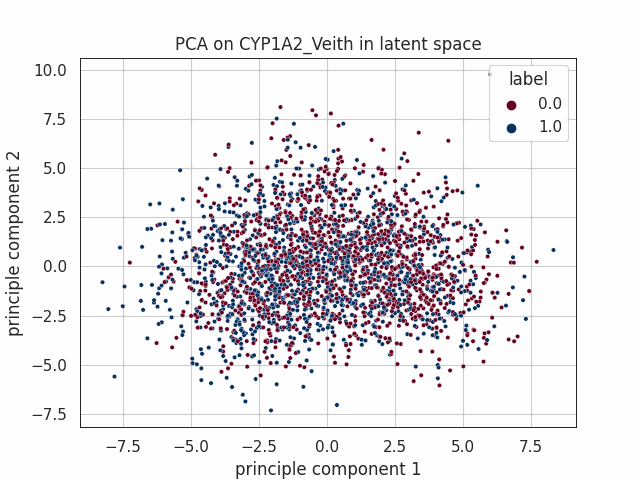

---> load gif from  M5/VAE_smiles/fig_CYP2C9_Veith.gif


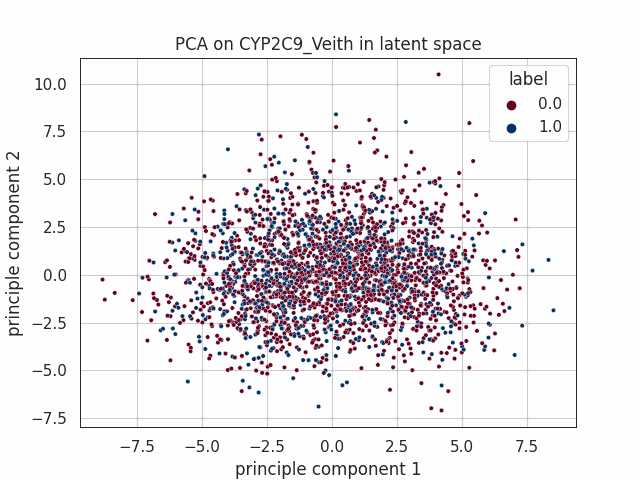

In [ ]:
import imageio

path = config['figure_path']
from os import walk
# files = next(walk(path), (None, None, []))[2]
# files
# for path in ['QED', 'SA']:
# name = ['qed', 'sa']
name = names_M5
for n in name:
    images = []
    for i in range(0,100):
        for j in range(1):
            file_name = path + f'/PCA_{n}_{i}.png'
            # print(file_name)
            try:
                images.append(imageio.imread(file_name))
            except: pass

    imageio.mimsave(f'{path}_{n}.gif', images, duration=1)
    from IPython.display import Image
    gif_path = f'{path}_{n}.gif'
    print('---> load gif from ', gif_path)
    display(Image(data=open(gif_path,'rb').read(), format='png'))